# Tutorial 6

In this tutorial, we consider the study and analysis of the eigenvalue problem associated to the following anisotropic diffusion operator
$$
- \nabla \cdot \mathbf{b} \otimes \mathbf{b} \nabla \phi = \omega^2 \phi
$$
where $\mathbf{b} = (\iota, 1)$ is the normalized vector of the magnetic field.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from vale import construct_model
import numpy as np
import os
import clapp.common.utils      as clapp_utils

# ... initializing Clapp
clapp_utils.initialize()
# ...

# ...
def construct_pde(filename, mapping, discretization):
    # ... clean input directory. needed for Fortran
    cmd = "rm -rf input"
    os.system(cmd)
    # ...

    # ... creates discretization parameters
    from clapp.disco.parameters.bspline import BSpline

    bspline_params = BSpline(discretization["n_elements"], \
                             discretization["degrees"], \
                             bc_min=[1,1], \
                             bc_max=[1,1])
    # ...

    # ... create a context from discretization
    from clapp.fema.context        import Context

    context = Context(dirname="input", \
                      discretization_params=bspline_params)
    # ...

    # ...
    pde = construct_model(filename, backend="clapp", \
                          context=context, mapping=mapping)
    # ...
    
    # ... clean input directory
    cmd = "rm -rf input"
    os.system(cmd)
    # ...
    
    return pde
# ...

We use **CAID** to create the geometry, then convert it to the *mapping* object from *CLAPP*

In [2]:
def run(form, functions=None, constants=None, plot_matrix=True, **settings):
    # ... gets the assembler associated to the weak formulation.
    assembler = form.assembler
    # ...

    # ... tells the assembler to use the provided values of constants
    if not (constants is None):
        assembler.set_constants(constants)
    # ...

    # ... assembling the linear system
    if plot_matrix:
        assembler.assemble()
    # ...
    
    # ... compute the glt symbol and evaluate it
    from glt.expression import glt_symbol_from_weak_formulation
    
    expr = glt_symbol_from_weak_formulation(form, \
                                            verbose=False, evaluate=True, \
                                            discretization=discretization, \
                                            user_constants=constants)
    # ...
    
    # ...
    from glt.expression import glt_plot_eigenvalues
    
    matrix = None
    if plot_matrix:
        matrix = form.matrix
        
    glt_plot_eigenvalues(expr, discretization, \
                         mapping=mapping, \
                         matrix=matrix, tolerance=1.-10, **settings)

    if plot_matrix:
        plt.legend(loc=2);
    # ...  
    
    return expr

We use **CAID** to create the geometry, then convert it to the *mapping* object from *CLAPP*

In [3]:
# ... creates a unit line geometry using CAID
from caid.cad_geometry import square
geometry = square()
# ...
    
# ...
from clapp.spl.mapping import Mapping
mapping = Mapping(geometry=geometry)
# ...

We specify the discretization, by giving the number of elements and spline degrees in every direction

In [4]:
# ... define a discretization
discretization = {"n_elements": [32,32], "degrees": [2,2]}
# ...

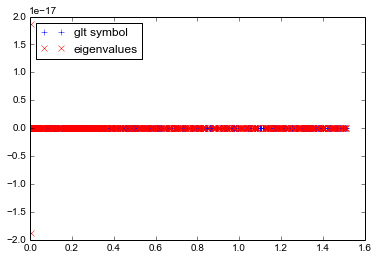

In [5]:
pde = construct_pde(filename="../../glt/tests/2d/inputs/anisotropic_diffusion_2.vl", 
                    mapping=mapping, 
                    discretization=discretization)

form = pde["a"]
b1   = pde["b1"]
b2   = pde["b2"]

b1.set("0.1")
b2.set("1.0")

expr = run(form, functions = {"b1": b1, "b2": b2})

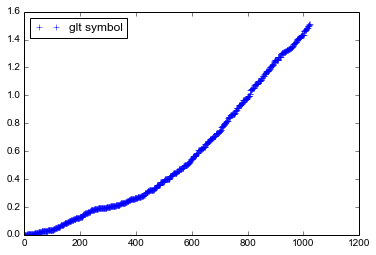

In [6]:
from glt.expression import glt_approximate_eigenvalues
t = glt_approximate_eigenvalues(expr, discretization)
t.sort()
plt.plot(t, "+b", label="glt symbol")
plt.legend(loc=2);

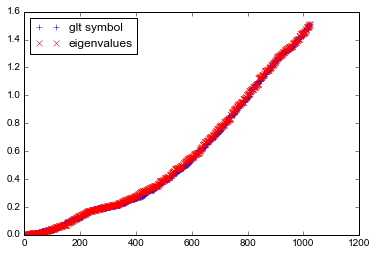

In [7]:
from glt.expression import glt_approximate_eigenvalues
t = glt_approximate_eigenvalues(expr, discretization)
t.sort()
plt.plot(t, "+b", label="glt symbol")       
# ...
if True:
    # ...
    from scipy.linalg import eig
    M = form.matrix.get().todense()
    w, v = eig(M)
    wr = w.real
    wr.sort()
    plt.plot(wr, "xr", label="eigenvalues")
    # ...
# ...
plt.legend(loc=2);

In [9]:
# ... Finalizing Clapp
clapp_utils.finalize()
# ...